# 🙋‍♂️ Вступление

Здравствуйте! Я начинающий аналитик. Проект в котором проанализирована выручка/размер/посетители/ассортимент магазинов. Данные представлены в виде цифр, добавлены категории размера магазинов, а также категории ассортимента товаров. В проекте использованы библиотеки pandas, matplotlib, seaborn.

# 📚 1. Импорт

In [ ]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
np.set_printoptions(precision=2)

# 📈 2. Параметры графиков

In [ ]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
font = {'family':'Helvetica, Ariel',
        'weight':'normal',
        'size':12}
plt.rc('font', **font)
sns.set(rc={"figure.dpi": 300, 'savefig.dpi': 300})
sns.set_context('notebook')
sns.set_style("ticks")
FIG_FONT = dict(family="Helvetica, Ariel", weight="bold", color="#7f7f7f")

# 🏪 3. Загрузка файла

- Ссылка на файл kaggle

https://www.kaggle.com/datasets/surajjha101/stores-area-and-sales-data

- Ссылка на файл google disk 

https://drive.google.com/file/d/1P6wjTYa43sZlVNrcwcu1F1VDnxe-I8Yy/view?usp=sharing

In [ ]:
!gdown 1P6wjTYa43sZlVNrcwcu1F1VDnxe-I8Yy

Downloading...
From: https://drive.google.com/uc?id=1P6wjTYa43sZlVNrcwcu1F1VDnxe-I8Yy
To: /content/Stores.csv
100% 22.5k/22.5k [00:00<00:00, 12.3MB/s]


In [ ]:
df = pd.read_csv('/content/Stores.csv')

In [ ]:
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


# 💡 4. Изучение файла и предобработка

1. **Store ID**: (Index) ID of the particular store.

2. **Store_Area**: Physical Area of the store in yard square.

3. **Items_Available**: Number of different items available in the corresponding store.

4. **DailyCustomerCount**: Number of customers who visited to stores on an average over month.

5. **Store_Sales**: Sales in (US $) that stores made.

Обработаем название колонок, в них есть пробелы, не только между слов но и в конце названия колонки. Изменим название колонок, приведем его в snake_case. Удалим **Store ID** из таблицы, он полностью дублируется индексом таблицы.

In [ ]:
df.columns = df.columns.str.replace(' ', '').str.lower()
df = df.drop('storeid', axis=1)

In [ ]:
df.head()

,store_area,items_available,daily_customer_count,store_sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620


### 4.1 Проверка на пустые значения

In [ ]:
df.isna().sum()

store_area              0
items_available         0
daily_customer_count    0
store_sales             0
dtype: int64

В таблице нет пропущенных значений.

### 4.2 Проверка на дубликаты

In [ ]:
df.duplicated().sum()

0

Явных дубликатов в таблице нет.

### 4.3 Создание категорий

*   по площади **store_area_cat**: *tiny/average/large*
*   по ассортименту **items_available_cat**: *small/medium/big*

In [ ]:
df['store_area_cat'] = pd.cut(df['store_area'], 3, labels=['tiny', 'average', 'large'])
df['items_available_cat'] = pd.cut(df['items_available'], 3, labels=['small', 'medium', 'big'])

In [ ]:
df.head()

,store_area,items_available,daily_customer_count,store_sales,store_area_cat,items_available_cat
0,1659,1961,530,66490,average,medium
1,1461,1752,210,39820,average,medium
2,1340,1609,720,54010,average,medium
3,1451,1748,620,53730,average,medium
4,1770,2111,450,46620,large,big


# 🔎 5. Анализ даных

Мы будем анализировать данные с помошью графиков.

- Для категориальных данных, будем использовать **bar plot** и **pie chart**.
- Для числовых данных, будем использовать **box plot** и **histogram**.

## 5.1 Одномерный анализ

In [ ]:
# Функции графиков

def univariate_multi_plot(df=df, x=None, xlabel=None, explode=None):
    fig, ax = plt.subplots(1, 2, figsize=(20, 7))
    sns.countplot(data=df, x=x, ax=ax[0], order=df[x].value_counts(ascending=True).index)
    df[x].value_counts(ascending=True).plot(kind="pie", autopct="%1.1f%%", ax=ax[1], explode=explode)
    sns.despine(bottom=True, left=True)
    ax[0].set_xlabel(xlabel=xlabel, size=12, fontdict=FIG_FONT)
    ax[0].set_ylabel(ylabel="")
    ax[1].set_ylabel(ylabel="")
    ax[0].bar_label(ax[0].containers[0], label_type='edge', size=12, padding=1, fontname="Helvetica, Ariel", 
                    color="#7f7f7f")
    fig.text(0.5, 1, f'{xlabel} Distribution', size=16, fontdict=FIG_FONT, ha="center", va="center")
    plt.show()

def univariate_numerical_plot(df=df, x=None, xlabel=None, bar_label=True):
    fig, ax = plt.subplots(1, 2, figsize=(20, 7))
    sns.histplot(data=df, x=x, kde=True, ax=ax[0])
    sns.boxplot(data=df, x=x, ax=ax[1])
    sns.despine(bottom=True, left=True)
    ax[0].set_xlabel(xlabel=xlabel, size=12, fontdict=FIG_FONT)
    ax[1].set_xlabel(xlabel=xlabel, size=12, fontdict=FIG_FONT)
    ax[0].set_ylabel(ylabel="")
    ax[1].set_ylabel(ylabel="")
    fig.text(0.5, 1, f'{xlabel} Distribution', size=16, fontdict=FIG_FONT, ha="center", va="center")
    plt.show()


### 5.1.1 Store Area

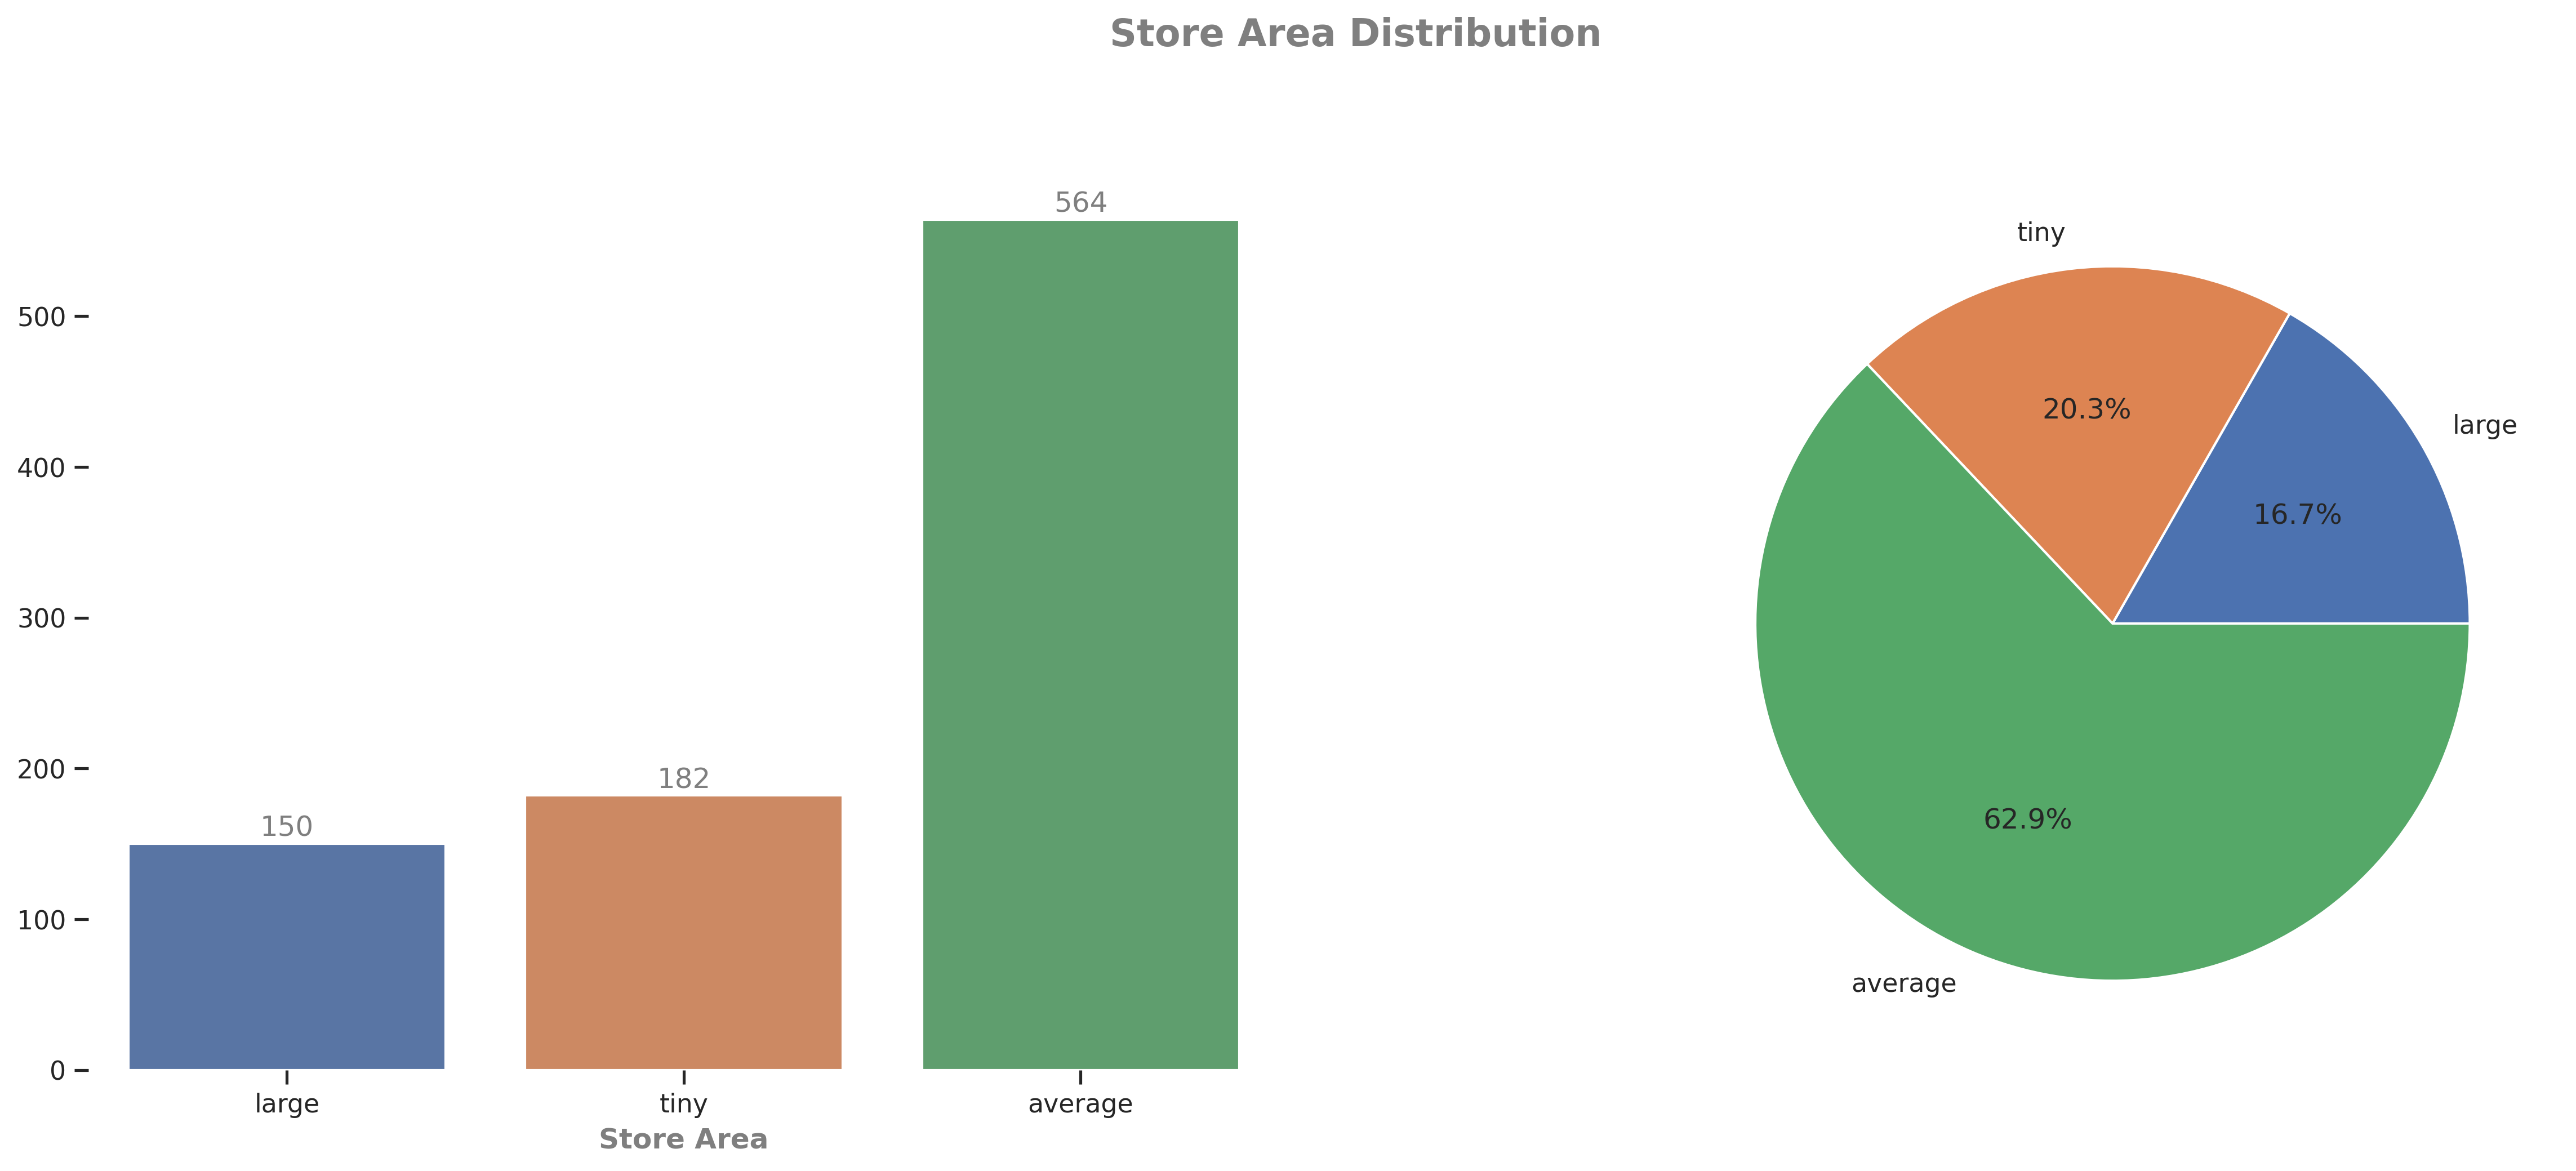

In [ ]:
univariate_multi_plot(x="store_area_cat", xlabel="Store Area")

- Подавляющее число магазинов имеют размер average 564 (62.9%) магазина.
- tiny 182 (20.3%) магазина.
- large 150 (16.7%) магазинов.

### 5.1.2 Items Available

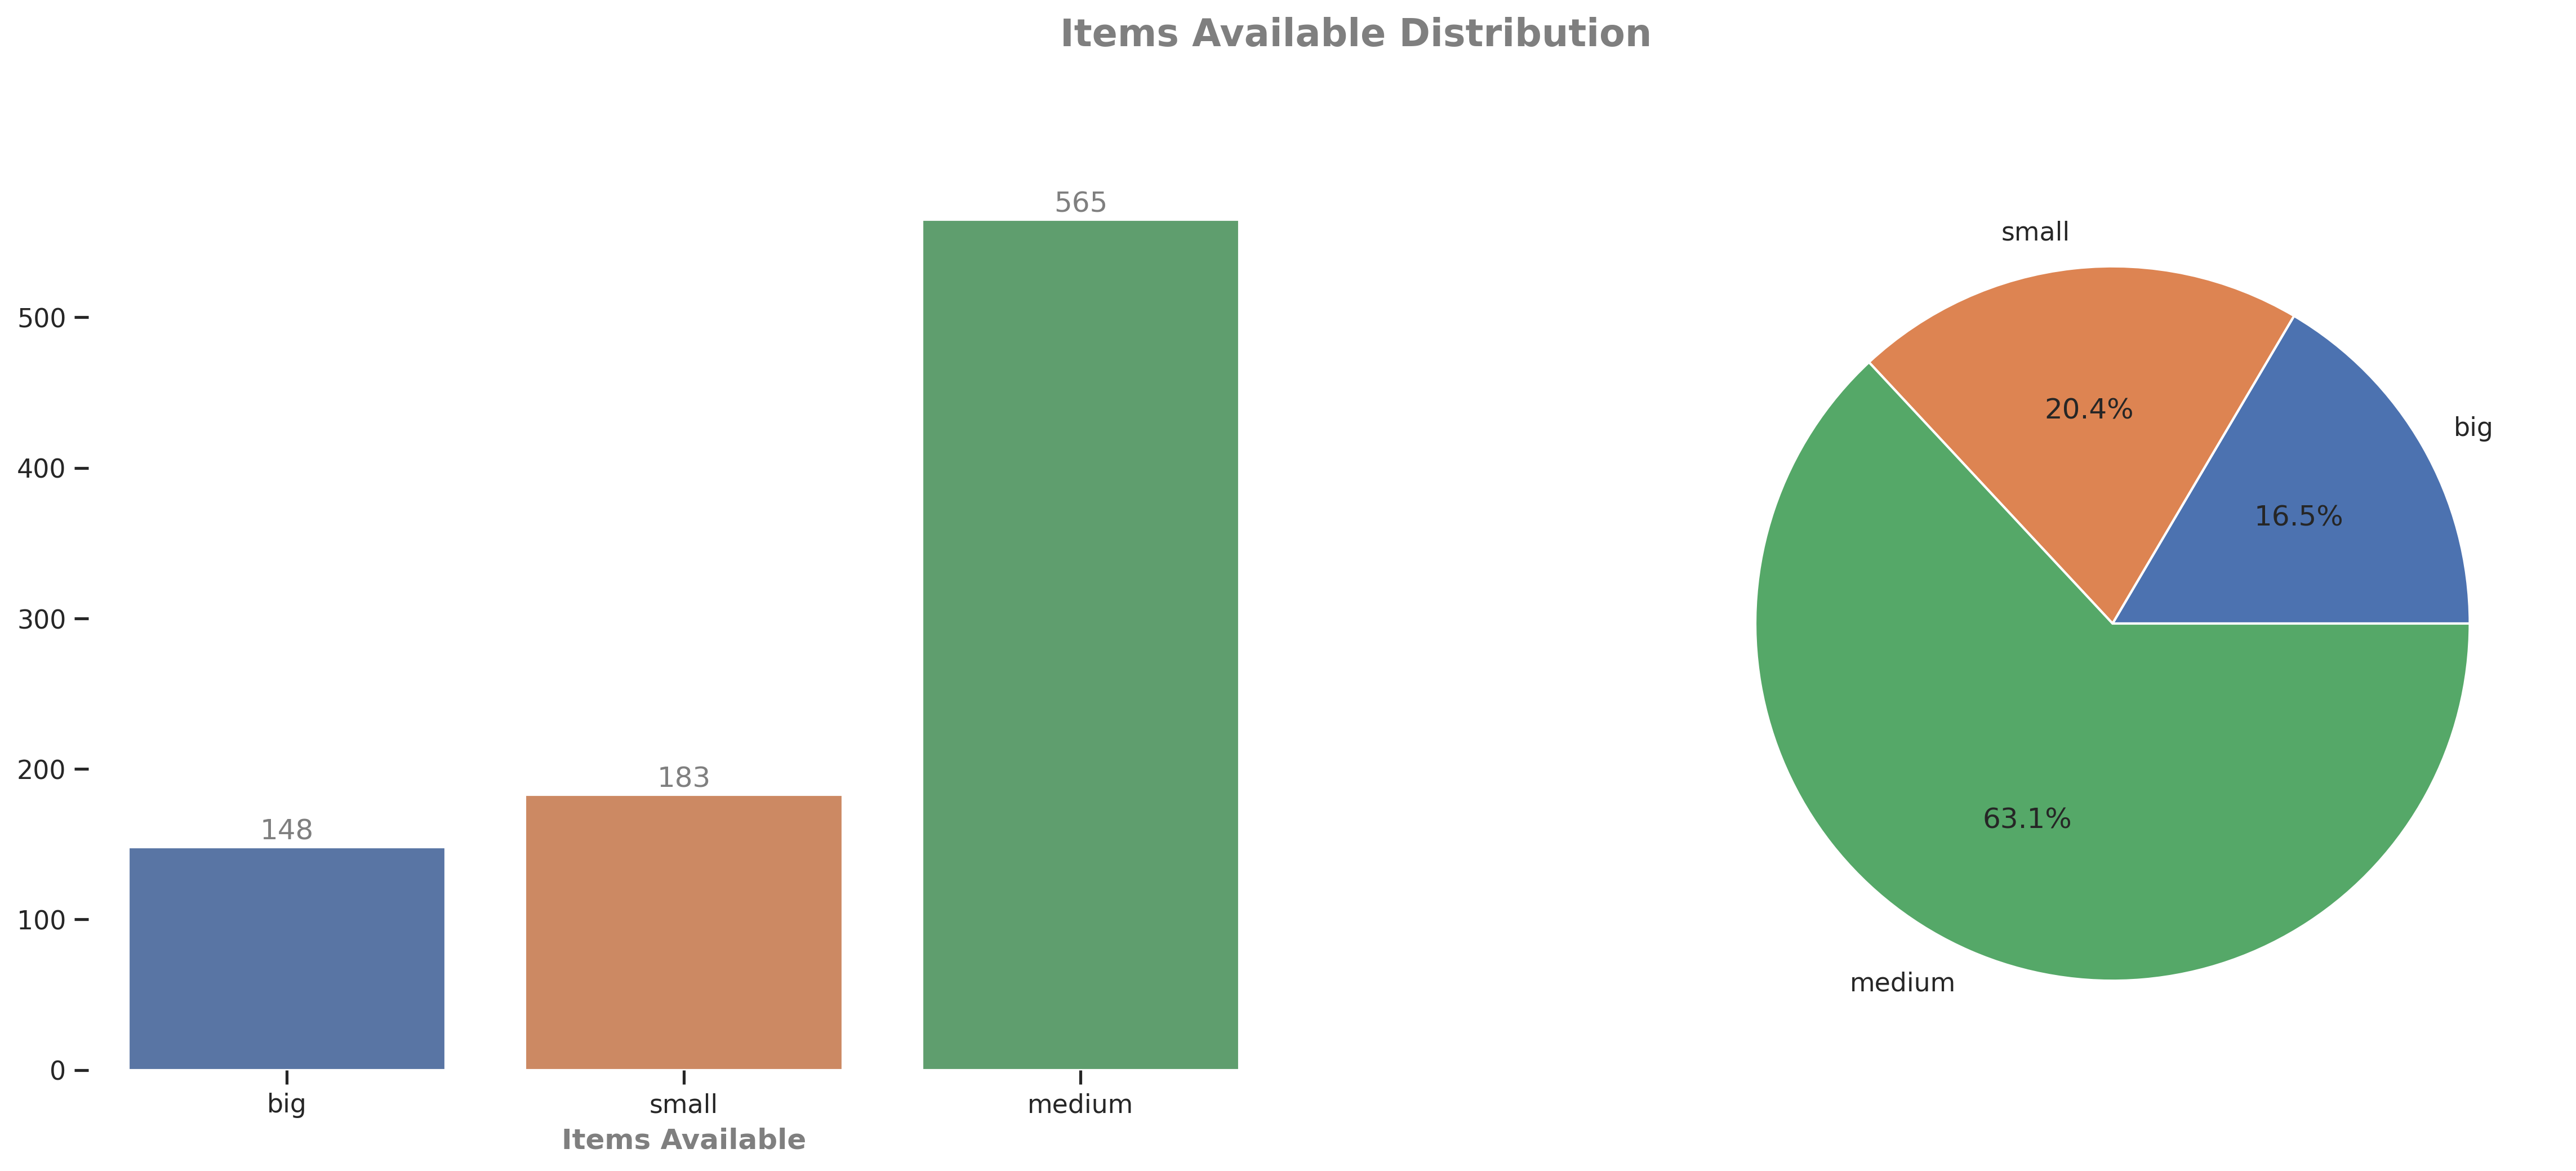

In [ ]:
univariate_multi_plot(x="items_available_cat", xlabel="Items Available")

- Магазинов с ассортиментом medium в 3 раза больше других 565 (63.1%) магазинов.
- big 148 (16.5%) и small 183 (20.4%) примерно равны по количеству магазинов.

### 5.1.3 Store Sales

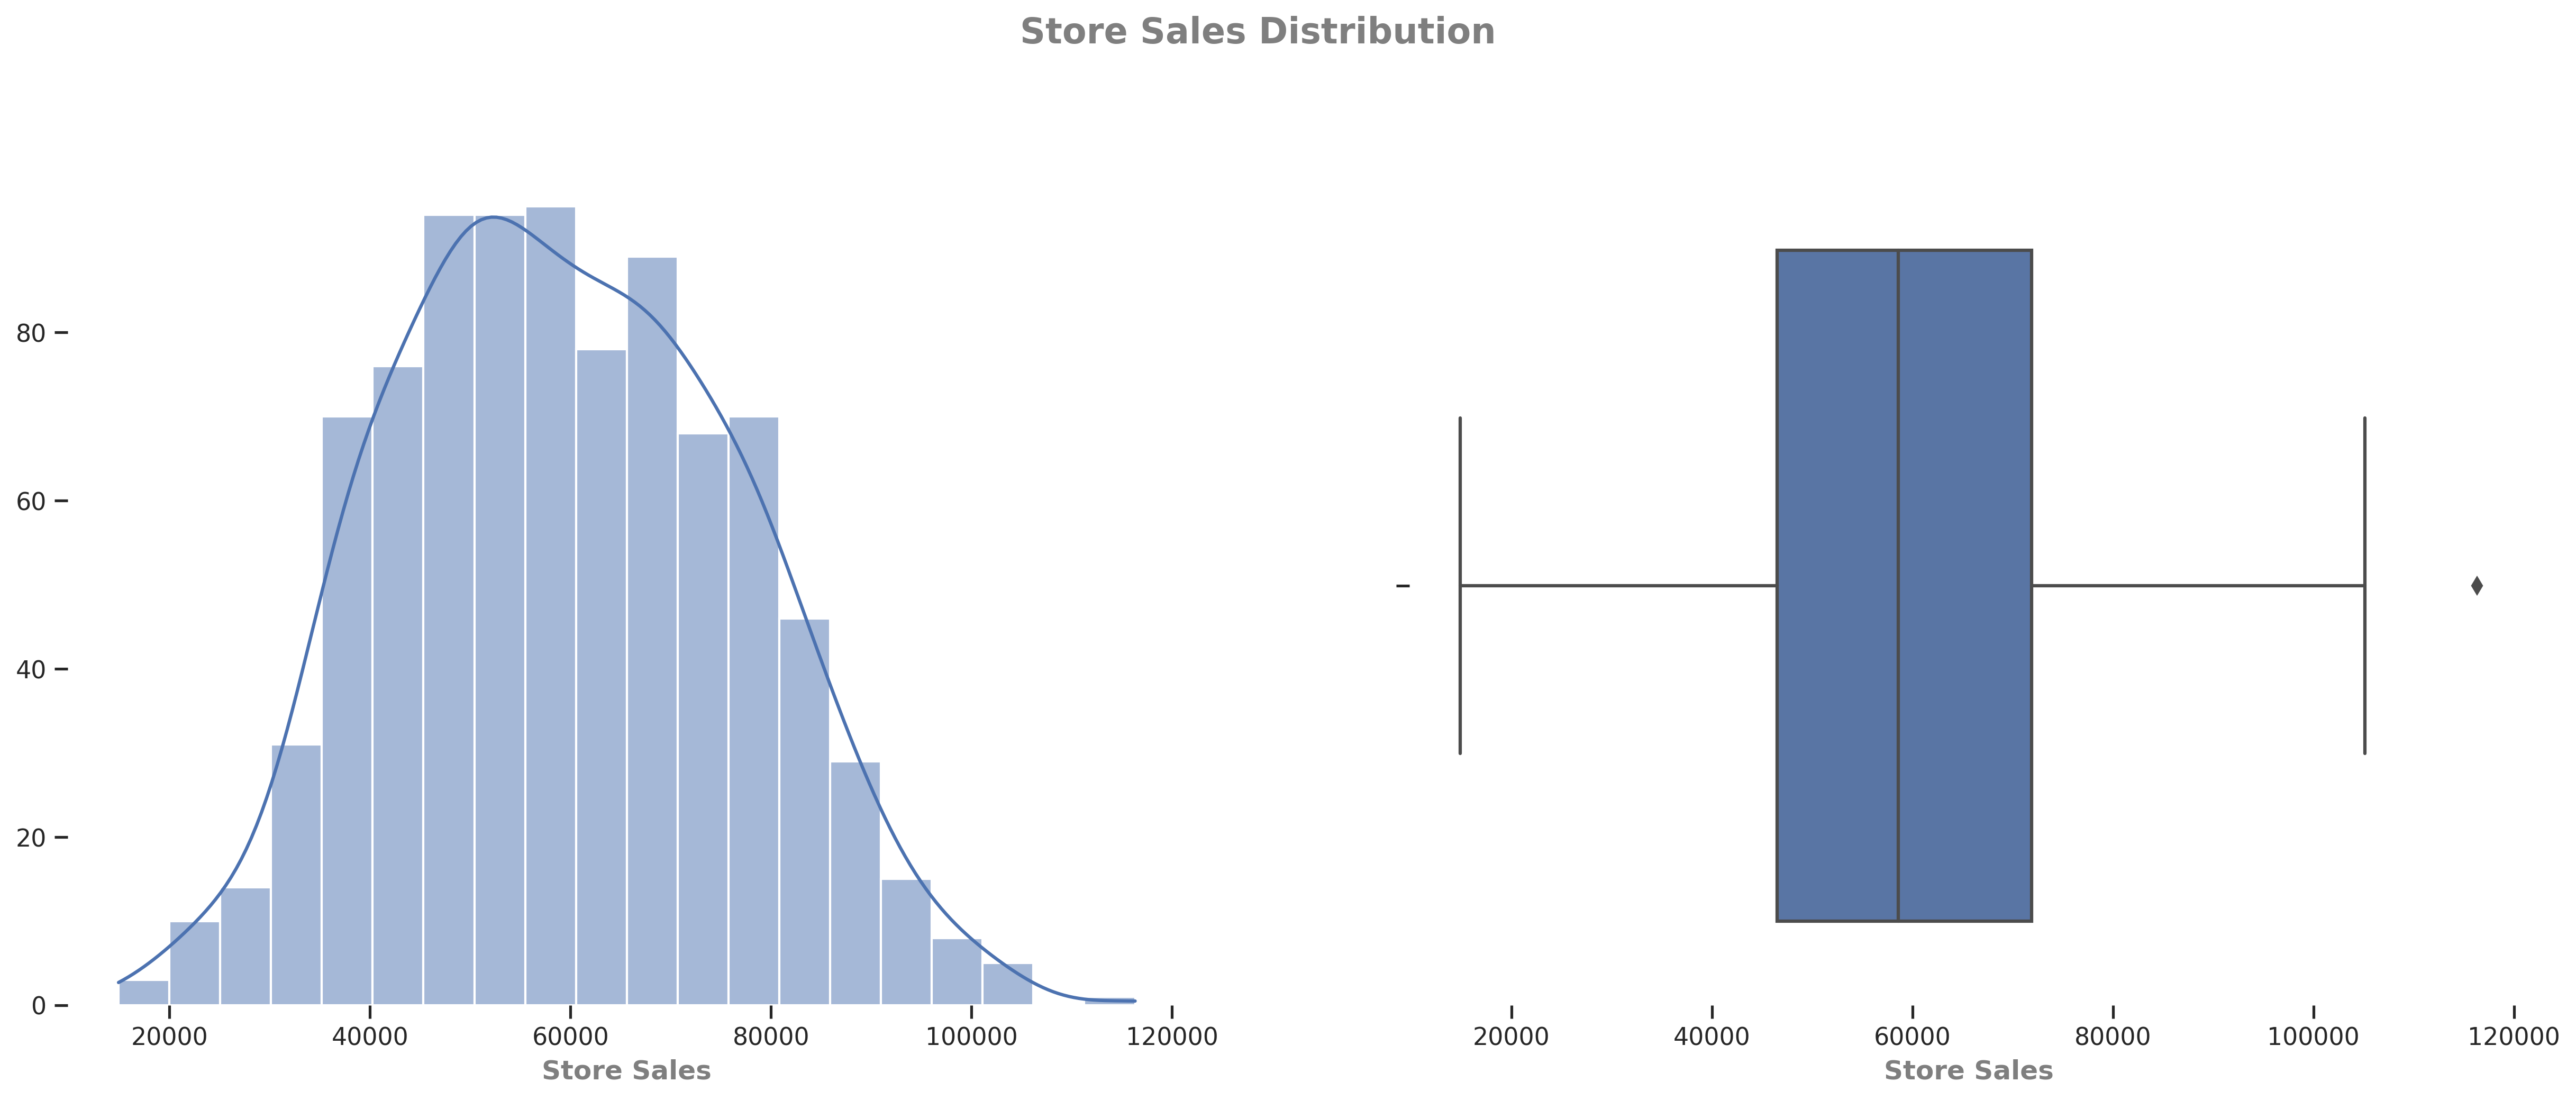

In [ ]:
univariate_numerical_plot(x="store_sales", xlabel="Store Sales")

- Средняя выручка около 60,000 USD
- Почти все магазины имеют выручку от 18,000 до 110,000 USD

### 5.1.4 Items Available

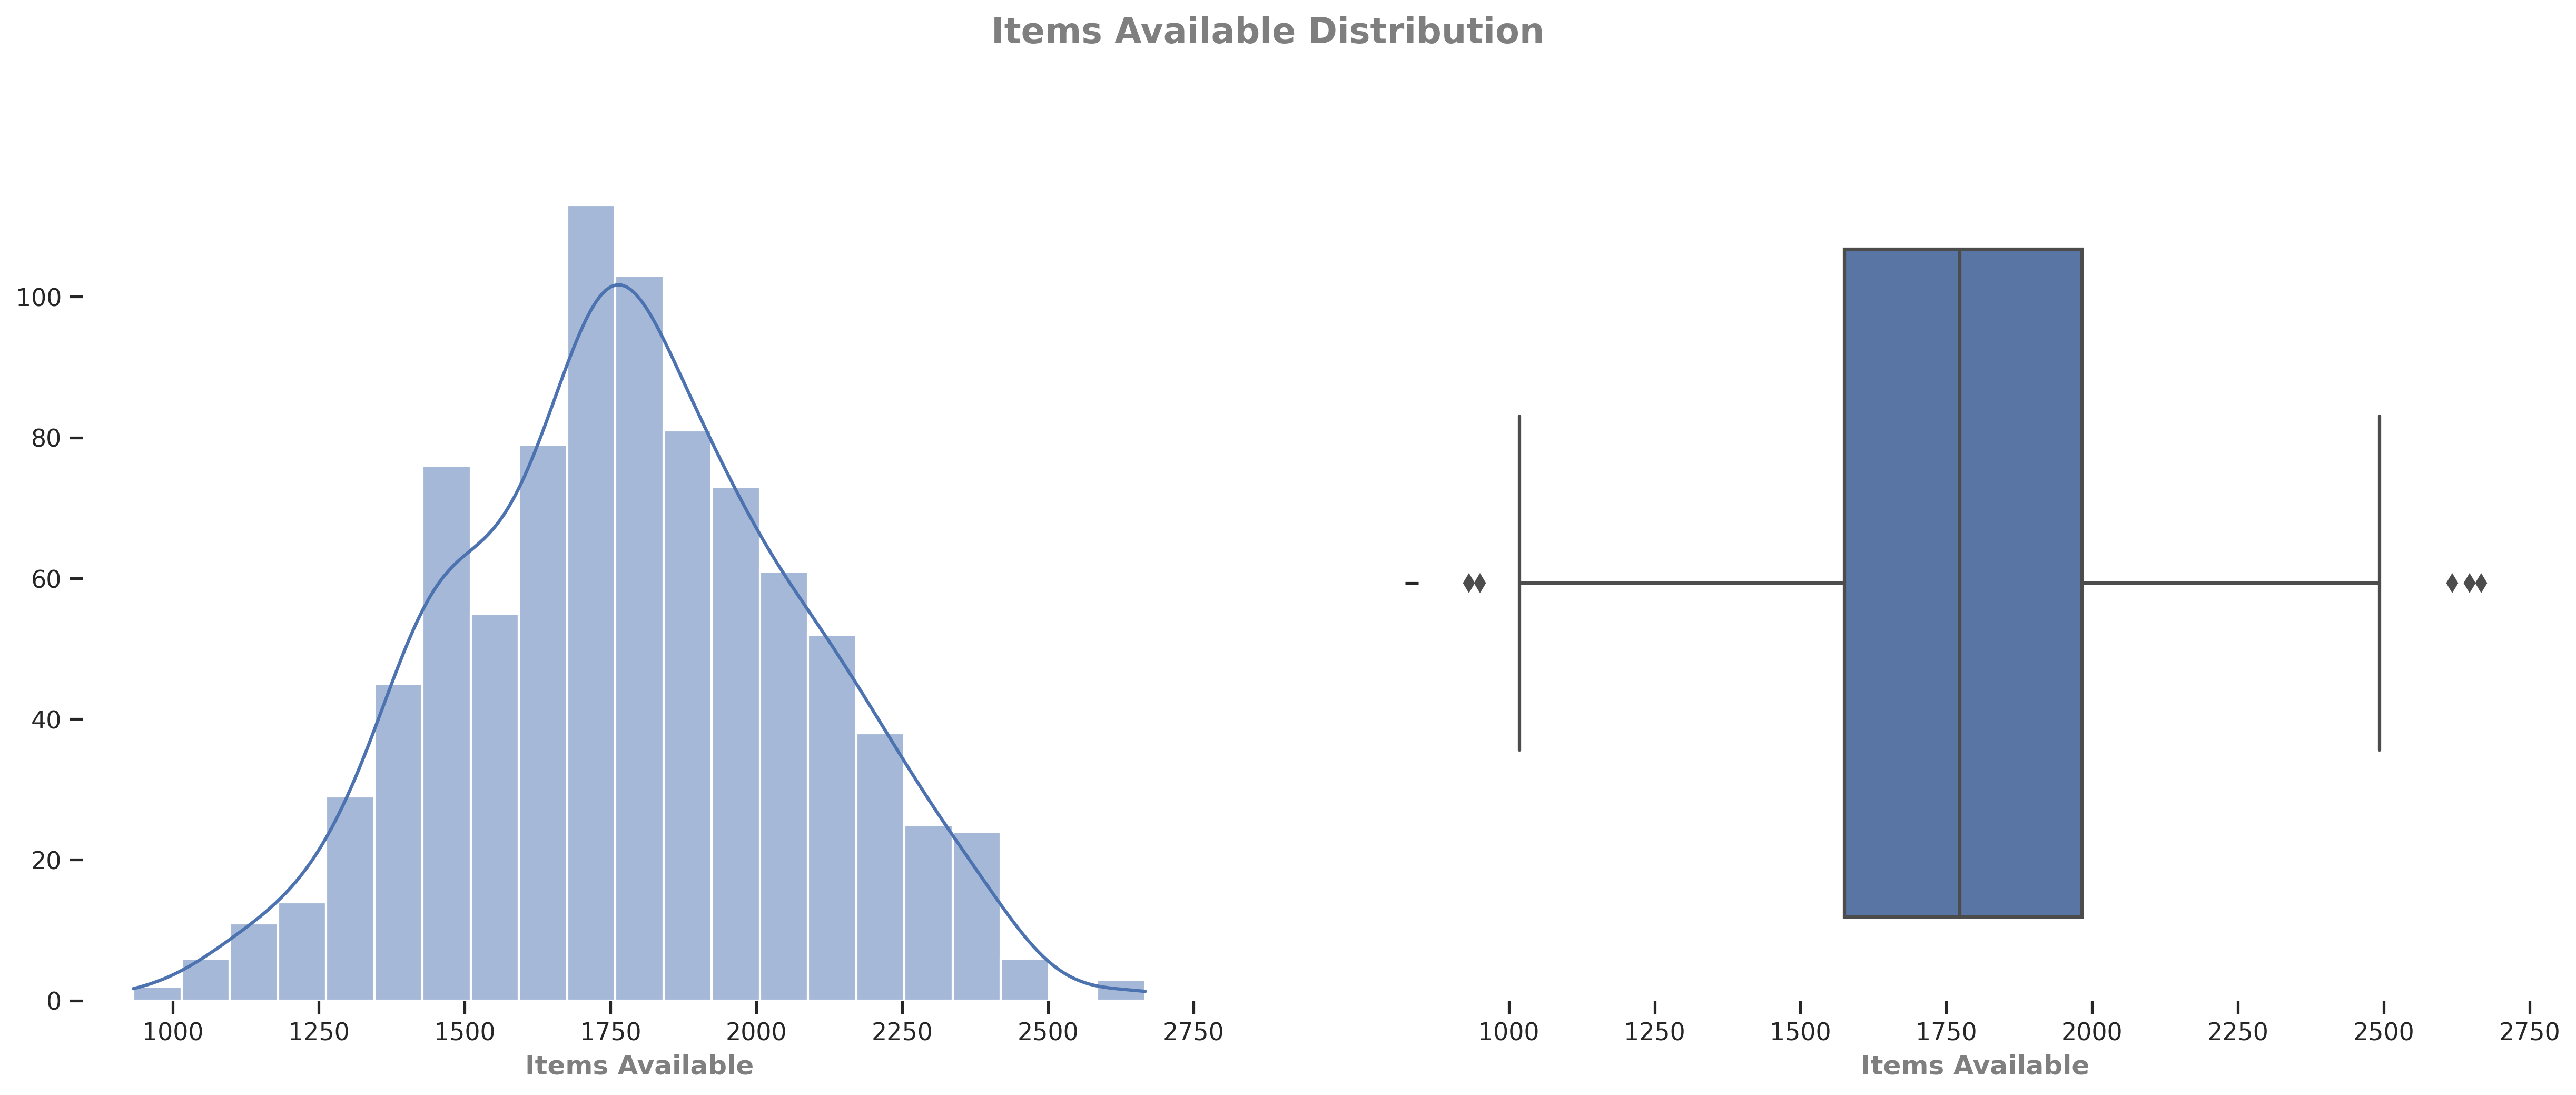

In [ ]:
univariate_numerical_plot(x="items_available", xlabel="Items Available")

- В среднем ассортимент товаров 1750 штук
- Почти все магазины имеют асортимент от 1000 до 2500 штук

### 5.1.5 Daily Customer Count

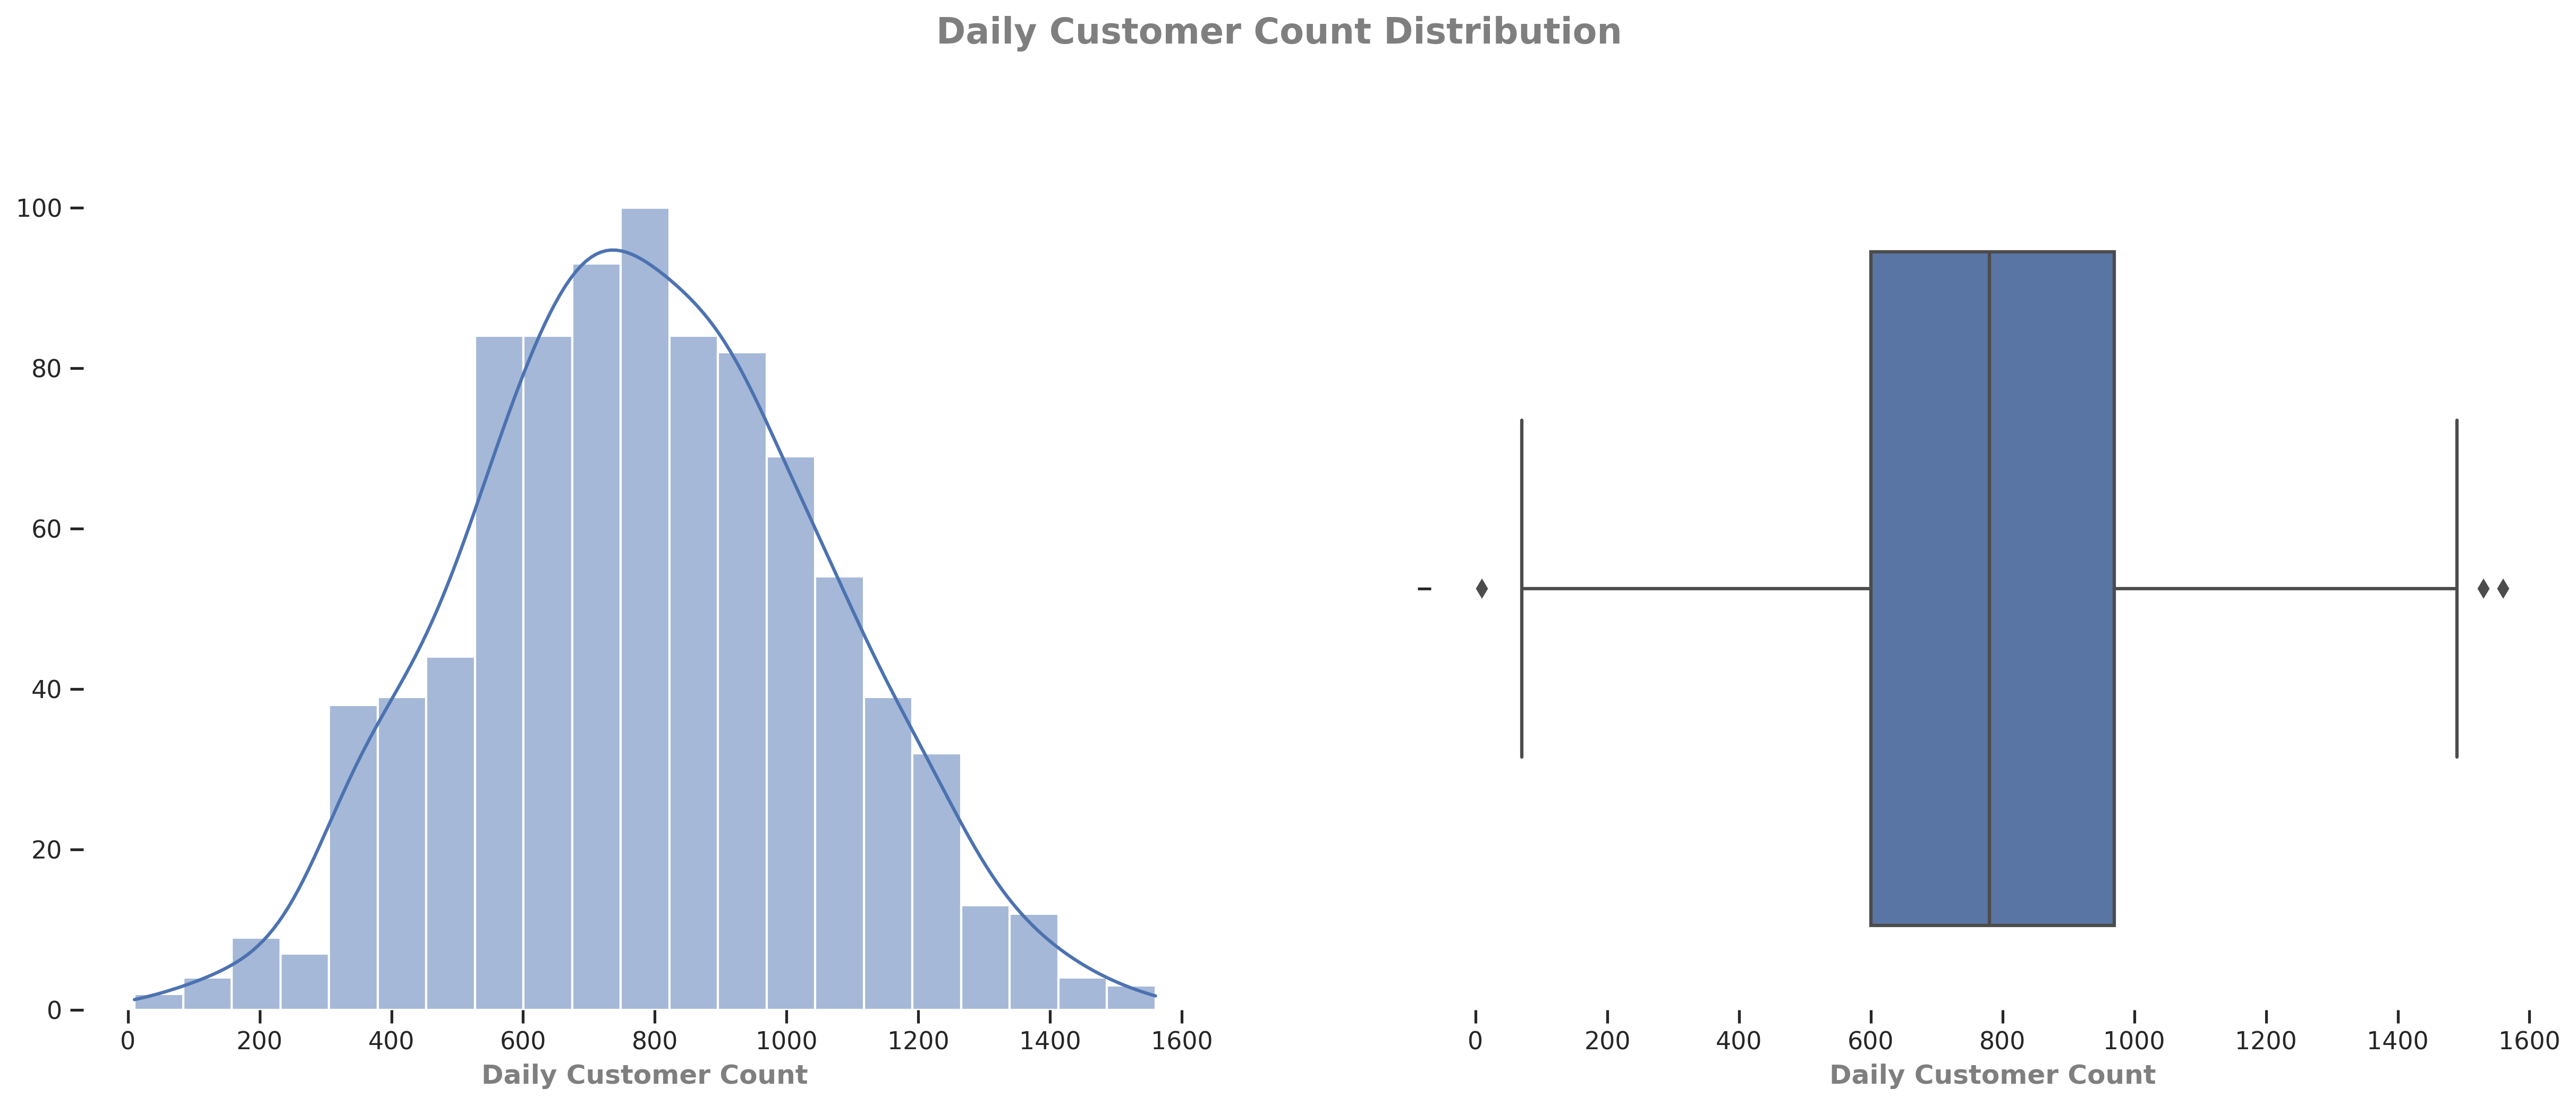

In [ ]:
univariate_numerical_plot(x="daily_customer_count", xlabel="Daily Customer Count")

- Около 800 человек посещает магазин в среднем.
- От 100 до 1500 человек приходят почти во все магазины.

## 5.2 Двумерный анализ

Проанализируем данные по нескольким колонкам.

In [ ]:
# Функции графиков

def multivariate_plot(df=df, x=None, y=None, hue=None, xlabel=None, ylable=None,
                      heading=None, rotation=None, bar_label=True, 
                      legend=False, rotate_label=False):
    fig, ax = plt.subplots(1, 1, figsize=(20, 7))
    df = df.groupby(x)[y].mean().sort_values().reset_index().copy()
    sns.barplot(data=df, x=x, y=y, hue=hue, ci=None)
    plt.ylabel(ylabel=ylable, size=12, fontdict=FIG_FONT)
    plt.xlabel(xlabel=xlabel, size=12, fontdict=FIG_FONT)
    plt.title(label=f'{heading} {xlabel}', size=16, fontdict=FIG_FONT)
    plt.xticks(rotation=rotation)
    if legend:
        plt.legend()
    if bar_label and rotate_label:
        ax.bar_label(ax.containers[0], label_type='edge', size=10, padding=3, fontname="Helvetica, Ariel", 
                    color="#7f7f7f", rotation="vertical")
    elif bar_label and not rotate_label:
        ax.bar_label(ax.containers[0], label_type='edge', size=12, padding=1, fontname="Helvetica, Ariel", 
                    color="#7f7f7f")
    sns.despine(bottom=True, left=True)
    plt.show()

### 5.2.1 Revenue And Store Area Category

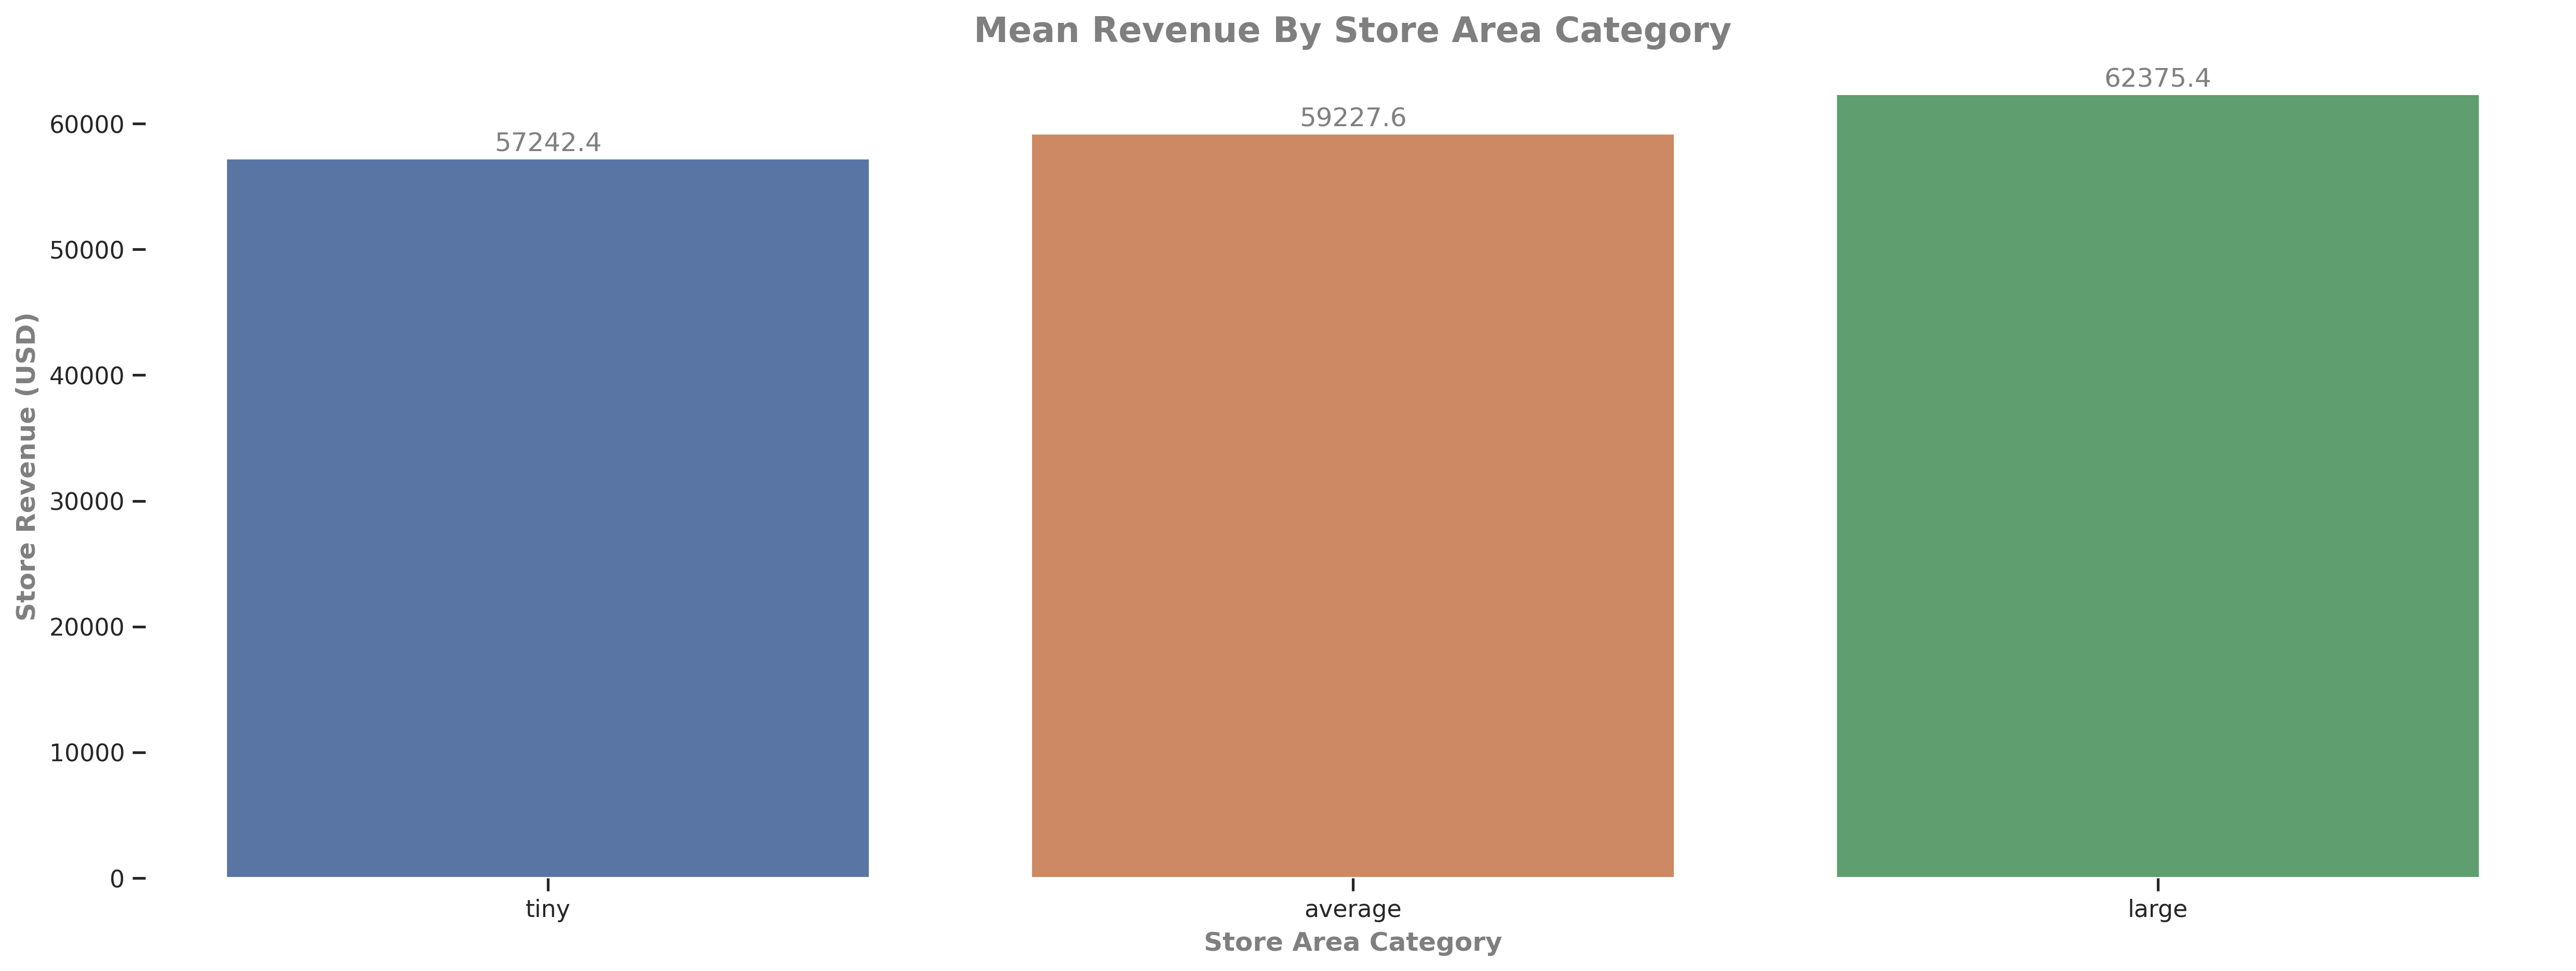

In [ ]:
multivariate_plot(
    df=df, x="store_area_cat", y="store_sales", 
    xlabel="Store Area Category", ylable="Store Revenue (USD)", 
    heading="Mean Revenue By", bar_label=True
    )

- Средняя выручка во всех видах магазинов существенно не отличается.

### 5.2.2 Items Available And Store Area Category

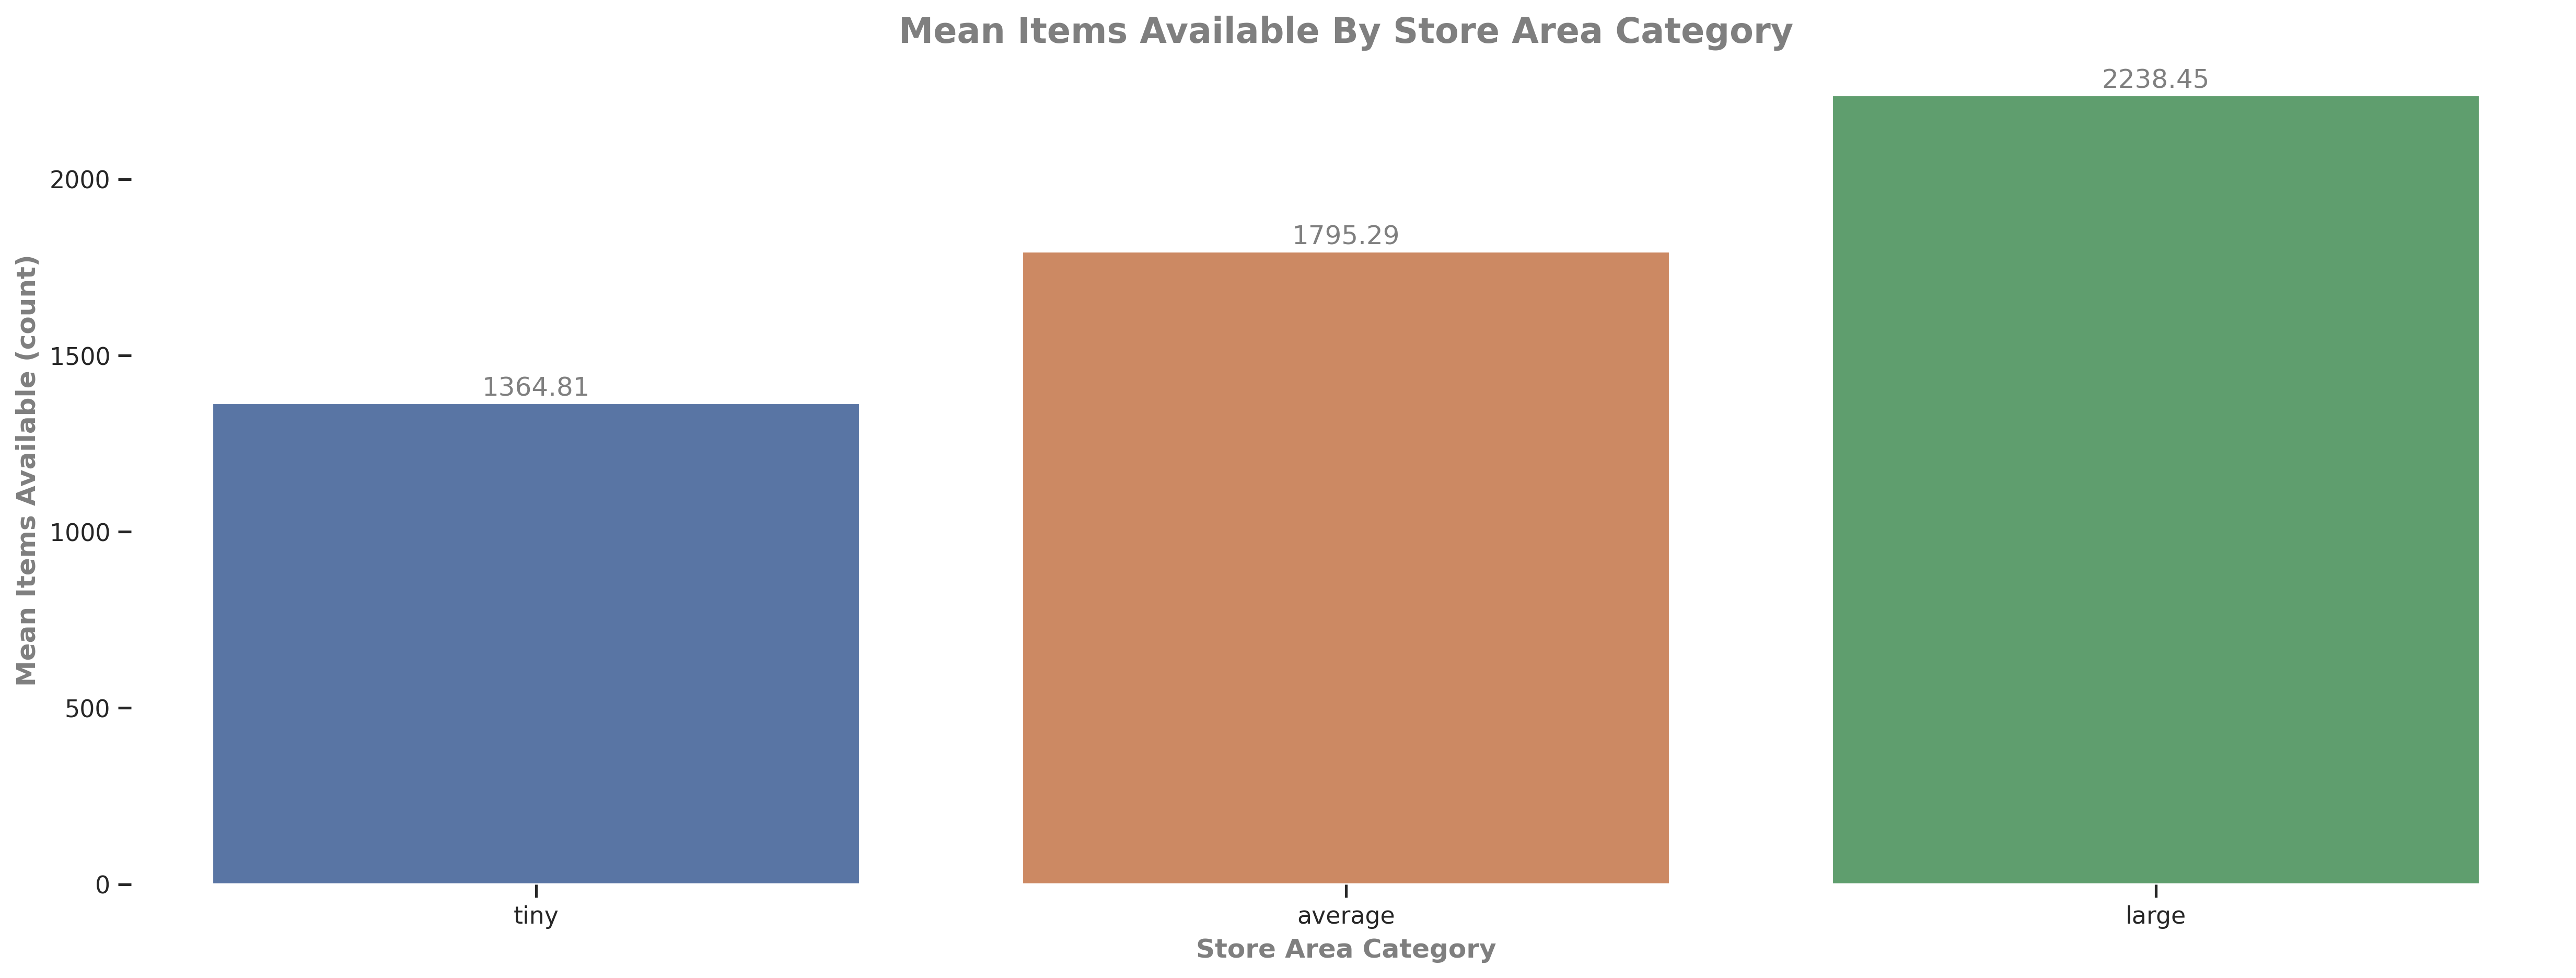

In [ ]:
multivariate_plot(
    df=df, x="store_area_cat", y="items_available", 
    xlabel="Store Area Category", ylable="Mean Items Available (count)", 
    heading="Mean Items Available By", bar_label=True
    )

- Ассортимент товаров различается значительно, между tiny и large магазинами разница ассортимента около 1000 позиций.

### 5.2.3 Daily Customer Count And Store Area Category

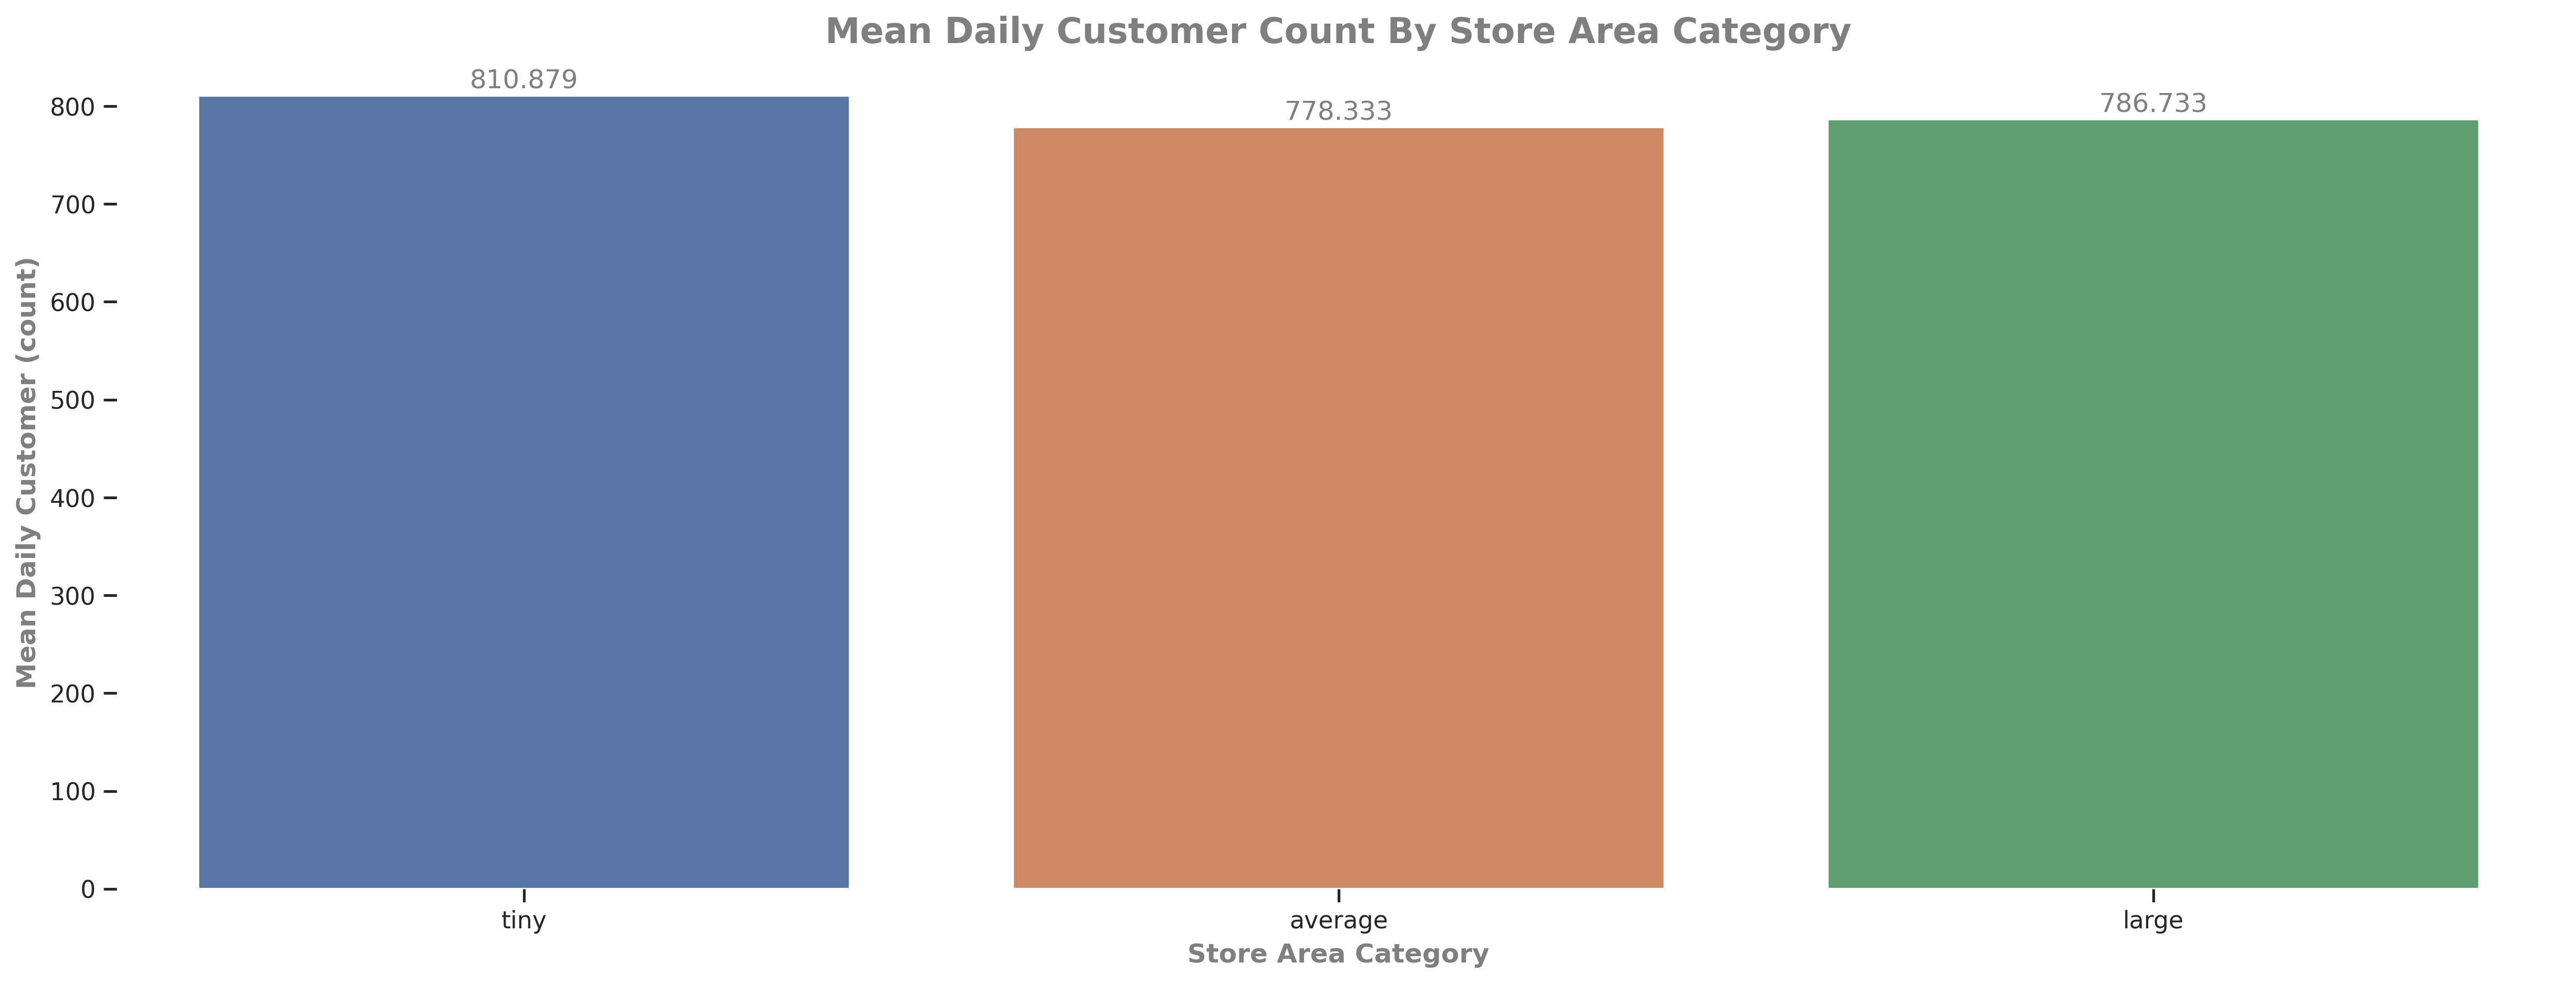

In [ ]:
multivariate_plot(
    df=df, x="store_area_cat", y="daily_customer_count", 
    xlabel="Store Area Category", ylable="Mean Daily Customer (count)", 
    heading="Mean Daily Customer Count By", bar_label=True
    )

- В магазины размера tiny в среднем ходят больше покупателей чем в large, но разница не существенная.

### 5.2.4 Pearson Correlation

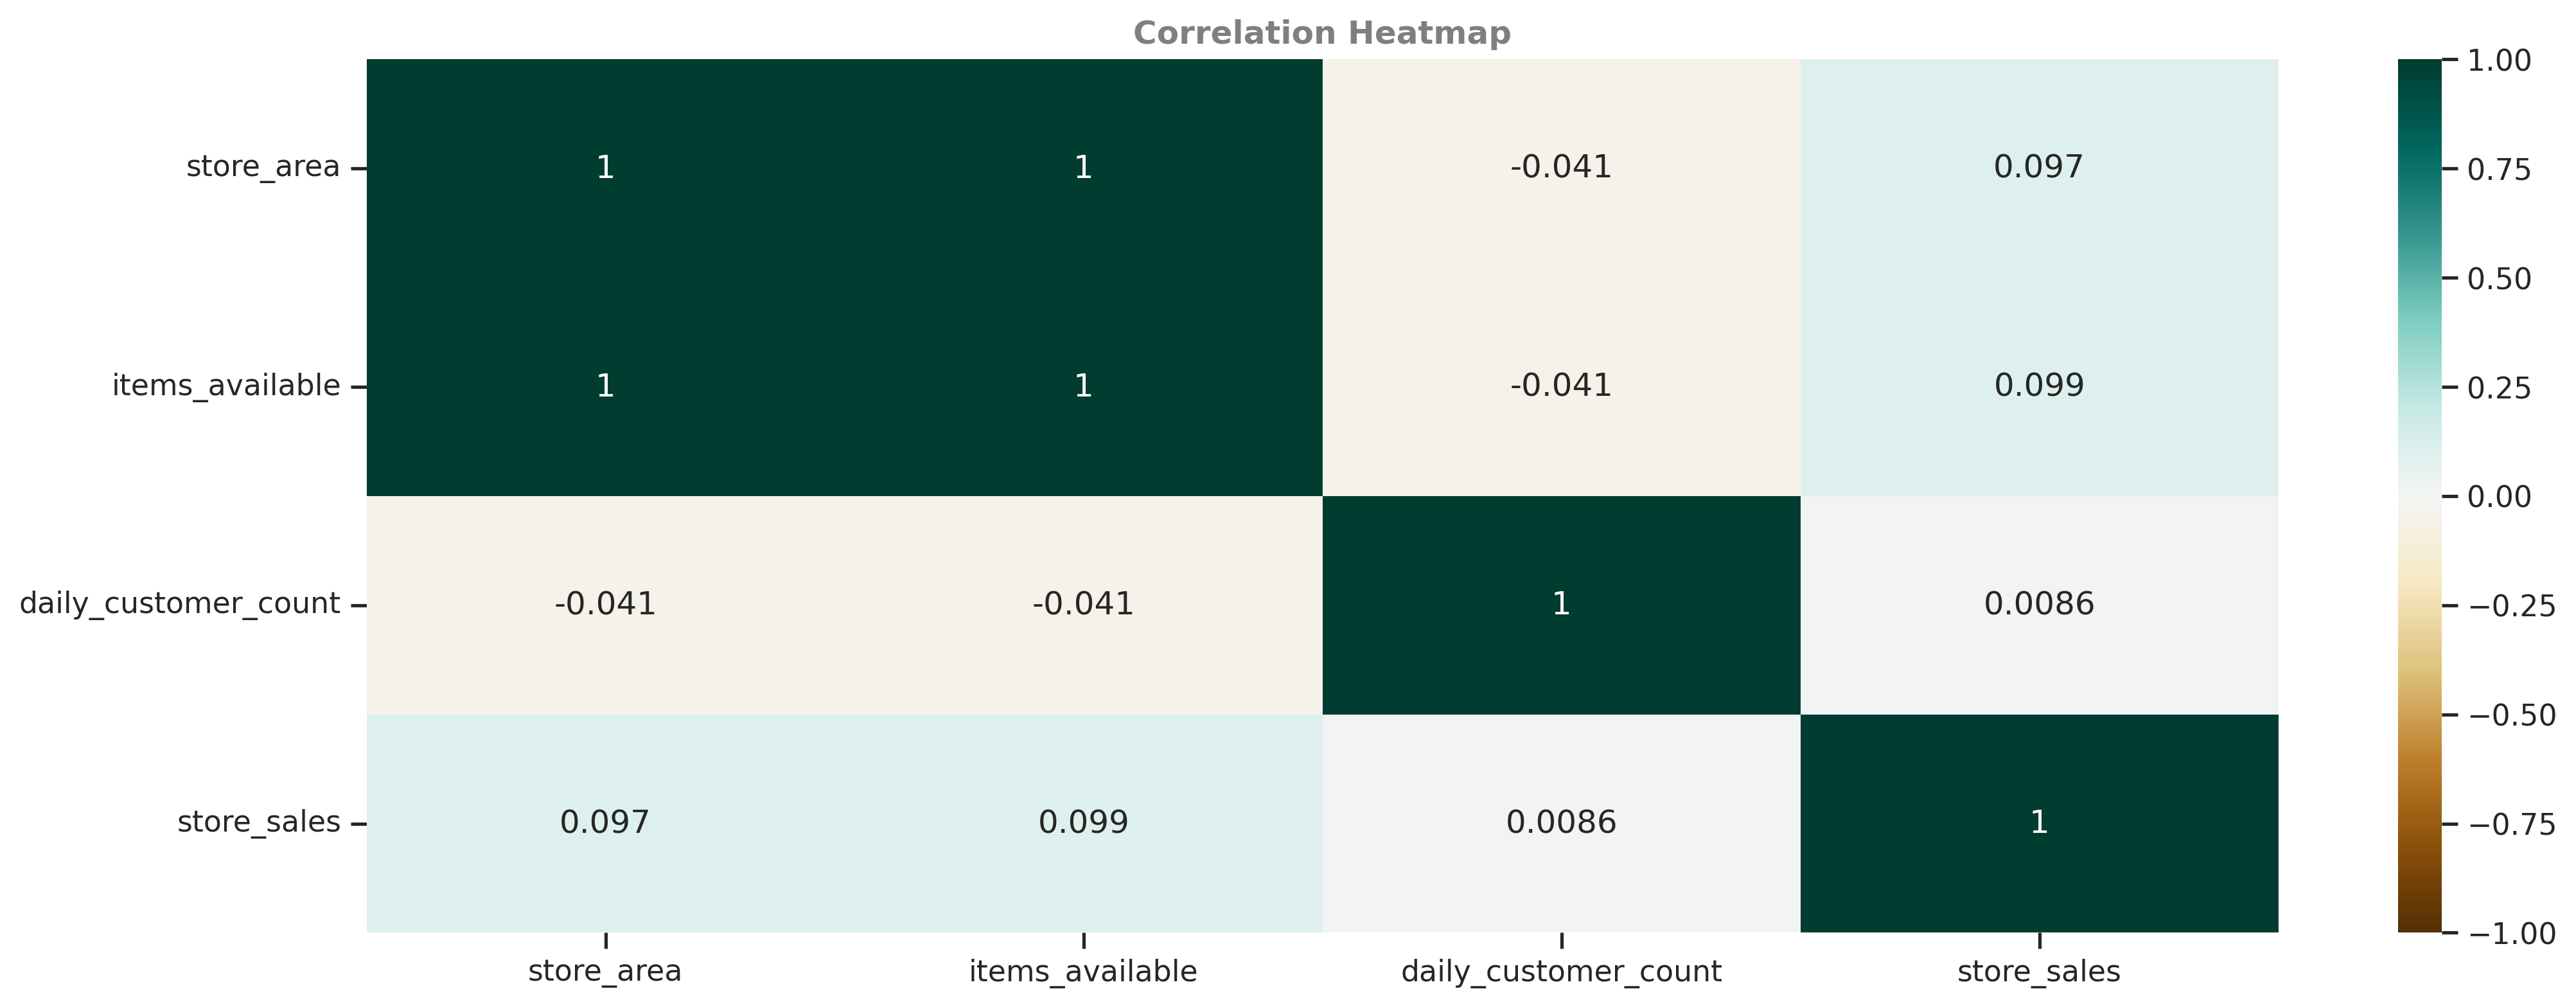

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict=FIG_FONT)
plt.show()

- Прослеживается сильная связь между размером магазина и ассортимента товаров. 
- Другие связи обнаружить не удалось. 

# 📝 6. Заключение

- Подавляющее число магазинов имеют размер **average** 564 (62.9%) магазина. Магазинов с ассортиментом medium в 3 раза больше других 565 (63.1%) магазинов. Прослеживается сильная связь между размером магазина и количеством ассортимента товаров.

- Средняя выручка около **60,000 USD**. Почти все магазины имеют выручку от 18,000 до 110,000 USD. При этом средняя выручка во всех видах магазинов существенно не отличается.

- В среднем ассортимент товаров **1750 штук**. Ассортимент товаров различается значительно, между tiny и large магазинами разница ассортимента около 1000 позиций.

- Около **800 человек** посещает магазин в среднем ежедневно. В магазины размера tiny в среднем ходят больше покупателей чем в large, но разница не существенная.
